In [58]:
# Import libraries
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [41]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
test_path = 'Dataset/Test'

In [19]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [20]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [24]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [22]:
# Getting number of output classes
folders = glob('Dataset/Train/*')
folders

['Dataset/Train/Parasite', 'Dataset/Train/Uninfected']

In [25]:

# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [31]:
# len(folders) is our output layer
# I am taking softmax and not sigmoid, because I am having two nodes, I could use sigmoid for one node.
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [32]:
# view the structure of the model
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [35]:
# tell the model what cost and optimization method to use
# Note: Using 'categorical_crossentropy' beucase I have two nodes, for one node I could use 'binary_crossentropy'

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [37]:
# Use the Image Data Generator to import the images from the dataset
# Applying image augmentation in training data, to increase data set, with variations of the image.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [38]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [39]:

training_set

In [42]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [44]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-44-69229fe26ea3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
13/13 [==============================] - 53s 4s/step - loss: 1.3596 - accuracy: 0.5264 - val_loss: 1.4526 - val_accuracy: 0.3284
Epoch 2/50
13/13 [==============================] - 58s 5s/step - loss: 0.7264 - accuracy: 0.6250 - val_loss: 0.5398 - val_accuracy: 0.6791
Epoch 3/50
13/13 [==============================] - 55s 4s/step - loss: 0.5938 - accuracy: 0.6875 - val_loss: 1.2004 - val_accuracy: 0.4254
Epoch 4/50
13/13 [==============================] - 59s 5s/step - loss: 0.5154 - accuracy: 0.7452 - val_loss: 0.4286 - val_accuracy: 0.7687
Epoch 5/50
13/13 [==============================] - 56s 4s/step - loss: 0.4045 - accuracy: 0.7957 - val_loss: 0.4276 - val_accuracy: 0.7910
Epoch 6/50
13/13 [==============================] - 57s 4s/step - loss: 0.3332 - accuracy: 0.8558 - val_loss: 0.4112 - val_accuracy: 0.8060
Epoch 7/50
13/13 [==============================] - 57s 4s/step - loss: 0.3795 - accuracy: 0.8101 - val_loss: 0.3701 - val_accuracy: 0.8209
Epoch 8/50
13/13 [==

In [48]:
scores = model.evaluate(test_set)
scores

5/5 [==============================] - 14s 3s/step - loss: 0.6180 - accuracy: 0.7090


[0.6179931163787842, 0.7089552283287048]

In [49]:
r.params

{'verbose': 1, 'epochs': 50, 'steps': 13}

In [50]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [51]:
loss = r.history['loss']
val_loss = r.history['val_loss']

accuracy = r.history['accuracy']
val_accuracy = r.history['val_accuracy']

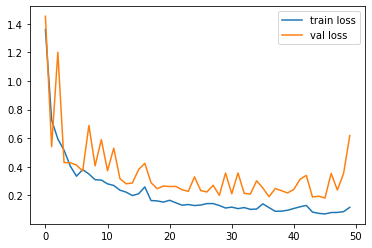

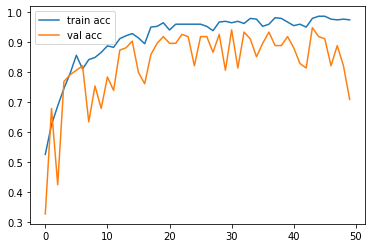

<Figure size 432x288 with 0 Axes>

In [63]:
# plot the loss
plt.plot(loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(accuracy, label='train acc')
plt.plot(val_accuracy, label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [62]:
# plt.figure(figsize=(15, 8))
# plt.subplot(1, 2, 1)
# plt.plot(range(50), accuracy, label='Training Accuracy')
# plt.plot(range(50), val_accuracy, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(range(50), loss, label='Training Loss')
# plt.plot(range(50), val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

In [64]:

# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('Malaria_model_vgg19.h5')